Name: Zixi Wang
    
    
Github Username: lacunaxu
    
    
USC ID: 2854187591

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [180]:
#problem (a)
data = pd.read_excel('Folds5x2_pp.xlsx')

print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


In [181]:
#problem (b)i
rows = data.shape[0]  
cols = data.shape[1]  
print(f"The total rows for this data are {rows}")
print(f"The total cols for this data are {cols}")
column_names = list(data.columns)
column_names_withoutpe = column_names[0:4]
print(column_names)

The total rows for this data are 9568
The total cols for this data are 5
['AT', 'V', 'AP', 'RH', 'PE']


Each row represents an individual observation which means each row means one power plant.
Each column represents the features of each power plant, it includes power plants' different features that consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

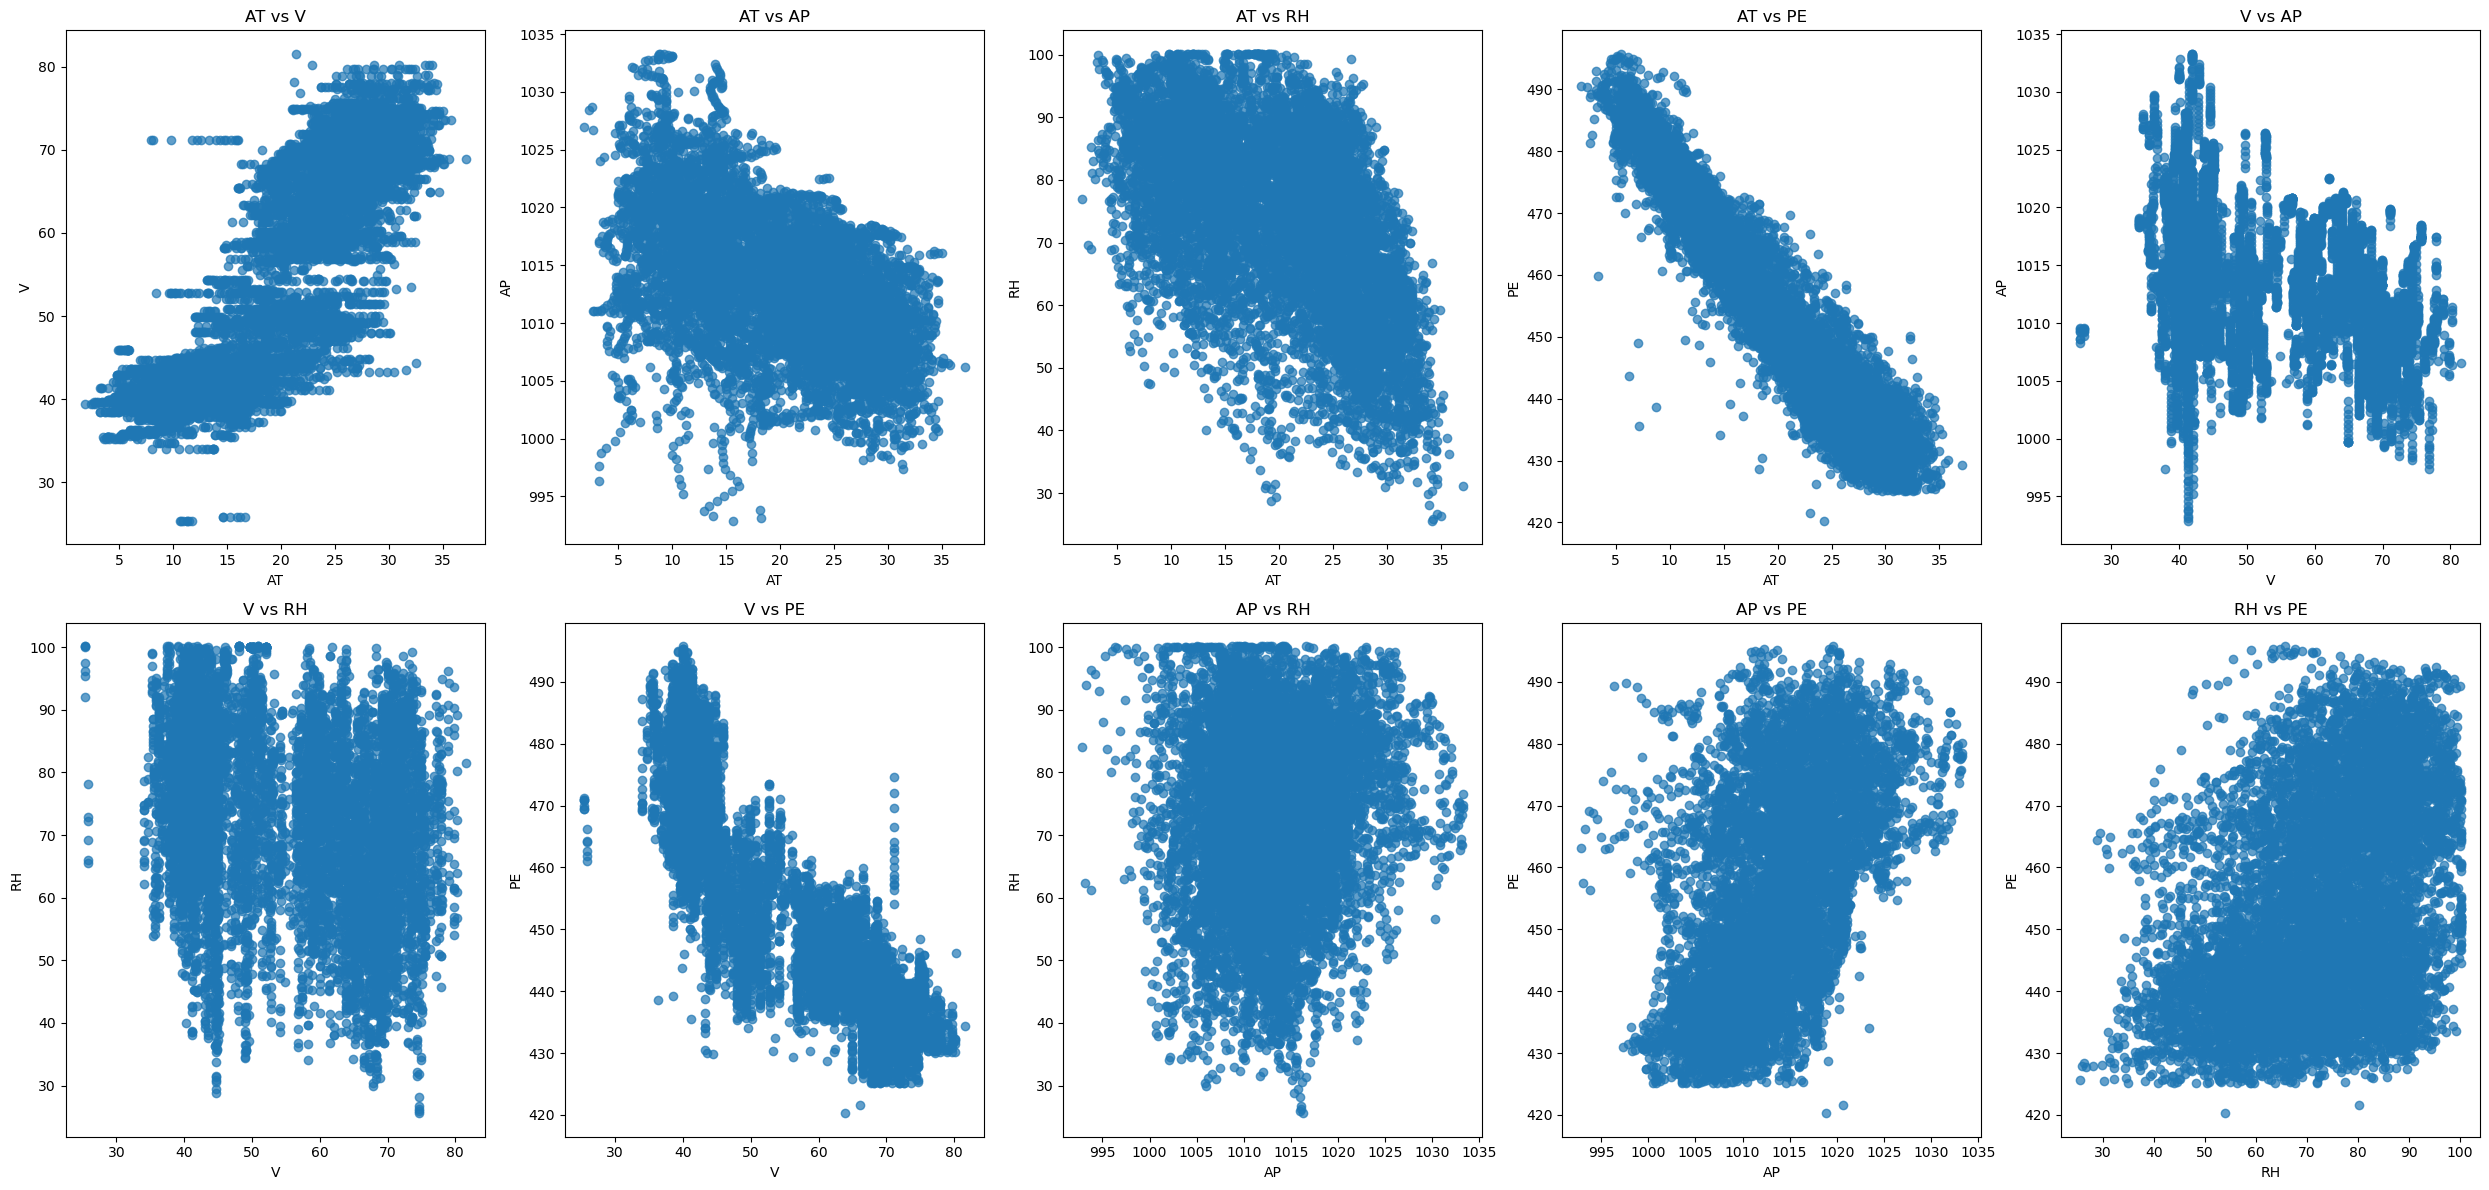

In [202]:
#problem (b)ii
fig, axes = plt.subplots(2, 5, figsize=(25, 12))

count = 0 
for i in range(5):
    for j in range(i + 1, 5):
        
        row = count // 5
        col = count % 5
        
        scatter = axes[row, col].scatter(data[column_names[i]], data[column_names[j]], alpha = 0.7)
        
        axes[row, col].set_title(f'{column_names[i]} vs {column_names[j]}')
        axes[row, col].set_xlabel(column_names[i])
        axes[row, col].set_ylabel(column_names[j])

        count += 1

plt.tight_layout()
plt.show()

I found that there is a significant linear relationship between AT vs V, AT vs PE, V vs PE 
RH vs PE, AT vs RH, AT vs AP, AP vs PE have weak linear relationship because their data are all crowded. Together they form a huge cluster. 
The remaining V vs AP and V vs Rh, AP vs RH have no obvious relationship as seen from the graph.

AT vs V strong linear positive relationship

AT vs AP weak linear negative relationship

AT vs RH weak linear negative relationship

AT vs PE strong linear negative relationship

V vs AP no linear relationship

V vs RH no linear relationship

V vs PE strong linear negative relationship

Ap vs RH no linear relationship

Ap vs PE weak linear positive relationship

RH vs PE weak linear positive relationship

In [183]:
#problem (b)iii
summary = data.describe().round(2)
ranges = summary.loc['max'] - summary.loc['min']
summary.loc['range'] = ranges
IQR = summary.loc['75%'] - summary.loc['25%']
summary.loc['IQR'] = IQR
print(summary)

            AT        V       AP       RH       PE
count  9568.00  9568.00  9568.00  9568.00  9568.00
mean     19.65    54.31  1013.26    73.31   454.37
std       7.45    12.71     5.94    14.60    17.07
min       1.81    25.36   992.89    25.56   420.26
25%      13.51    41.74  1009.10    63.33   439.75
50%      20.34    52.08  1012.94    74.97   451.55
75%      25.72    66.54  1017.26    84.83   468.43
max      37.11    81.56  1033.30   100.16   495.76
range    35.30    56.20    40.41    74.60    75.50
IQR      12.21    24.80     8.16    21.50    28.68


In [184]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

y = data['PE']
linear_model = {}
outliers = {}
for predictor in column_names_withoutpe:
    X = sm.add_constant(data[predictor])
    linear_model[predictor] = sm.OLS(y, X).fit()
    
    residuals = linear_model[predictor].get_influence().resid_studentized_internal
    outliers[predictor] = np.where(np.abs(residuals) > 3)[0]
    
    
results_summary = {i: linear_model[i].summary() for i in linear_model}
print(results_summary)
p_values = {i: linear_model[i].pvalues[1] for i in linear_model}
significant_p = [p for p, val in p_values.items() if val < 0.05]
print(significant_p)
print(outliers)

{'AT': <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:57:47   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

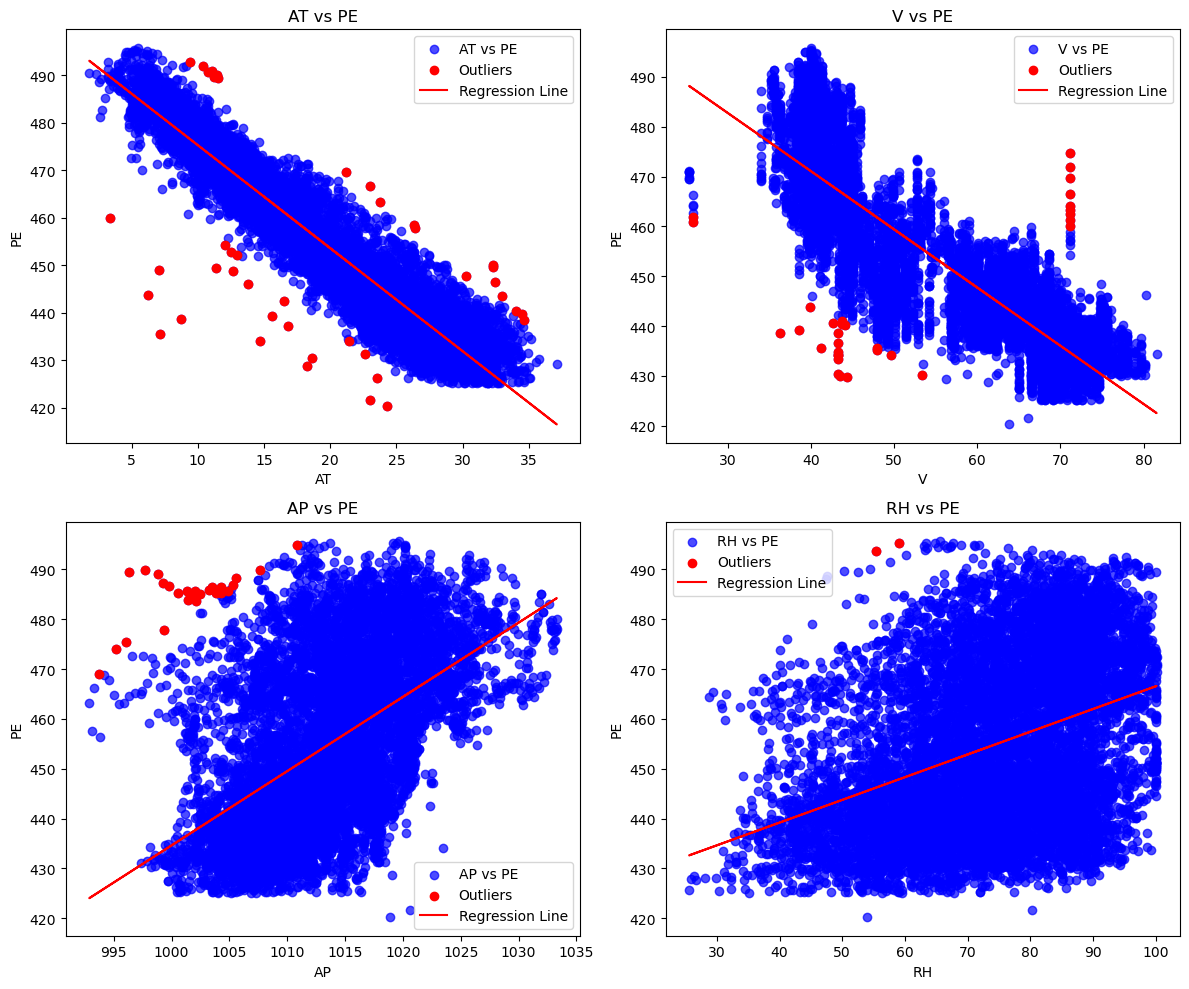

In [185]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs = axs.flatten()

for i, predictor in enumerate(column_names_withoutpe):
    
    axs[i].scatter(data[predictor], y, label=f'{predictor} vs PE', color='blue', alpha=0.7)
    
    axs[i].scatter(data.loc[outliers[predictor], predictor], y.loc[outliers[predictor]], 
                   color='red', label='Outliers')
    
    axs[i].plot(data[predictor], linear_model[predictor].predict(), color='red', label='Regression Line')
    
    axs[i].set_title(f'{predictor} vs PE')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('PE')
    
    # Add a legend
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In which of the models is there a statistically significant
association between the predictor and the response?

the significant value will be all AT, V, AP and RH variables since 
their p value all lower than 0.05

I think AT shows a negative, strong, linear relationship with PE
V shows a negative, weak, linear relationship with PE
AP and RH shows positive, weaker, linear relationship with PE

Are there any outliers that you would like to remove from
your data for each of these regression tasks?

Yes, there any outliers that I want to remove from me data which shows in red in my plot.
They needs to be remove because their value outside the normal distribution range 3 or -3
and a studentized residual outside this range indicates that the corresponding data point 
is very unlikely under the model’s assumptions and could be an outlier.

In [186]:
#(d)
X = sm.add_constant(data[column_names_withoutpe])

multiple_model = sm.OLS(y, X).fit()
significant_predictors = multiple_model.pvalues[multiple_model.pvalues < 0.05].index

print(multiple_model.summary())
print(f"There are no redictors that we need to reject the null hypothesis.")

There are no redictors that we need to reject the null hypothesis.
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:57:48   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

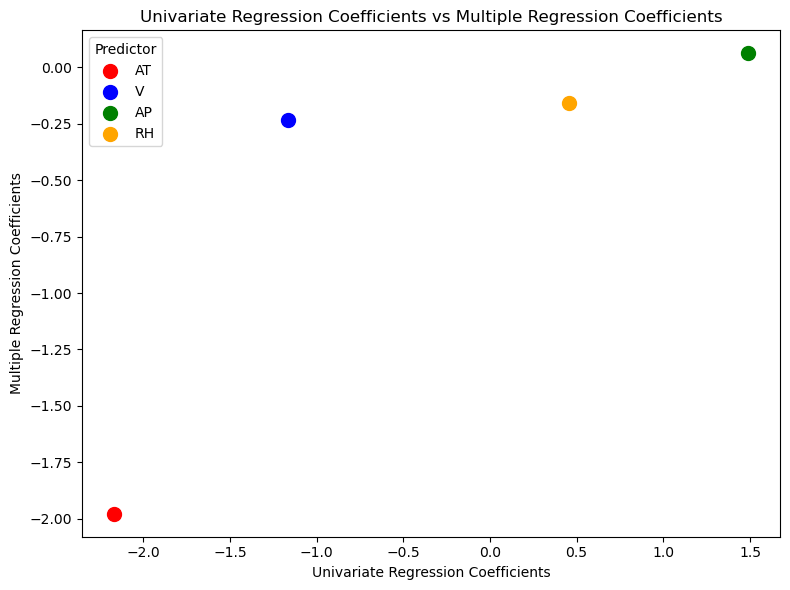

In [187]:
#(e)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
univariate = [linear_model[predictor].params[1] for predictor in column_names_withoutpe]
multiple = multiple_model.params[1:5] 

plt.scatter(univariate, multiple)
colors =  ['red', 'blue', 'green', 'orange']

for i, predictor in enumerate(column_names_withoutpe):
    plt.scatter(univariate[i], multiple[i], color=colors[i], label=predictor, s=100)

plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Univariate Regression Coefficients vs Multiple Regression Coefficients")
plt.legend(title='Predictor')

plt.tight_layout()
plt.show()

Compare 1c and 1d, 1c shows the significant value will be all AT, V, AP and RH variables, and 1d shows the same result. 

The points more near the line y = x means the coefficient for univariate and multiple are more similar.
So from the figure we can see that the deviation of V is the largest among these four variables.

In [188]:
#(f)
nonlinear_model = {}
p_values = {}

for predictor in column_names_withoutpe:
    
    X = data[[predictor]]
    
    poly = PolynomialFeatures(degree=3, include_bias=True)
    X_poly = poly.fit_transform(X)
    
    model = sm.OLS(y, X_poly).fit()
    
    nonlinear_model[predictor] = model
    
    p_values[predictor] = model.pvalues
    
    print(f"summary {predictor} is {model.summary()}")

summary AT is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:57:48   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    73

In [189]:
print(p_values)
for p in p_values:
    
    p1 = p_values[predictor][1]
    p2 = p_values[predictor][2]
    p3 = p_values[predictor][3]
 
    if p2 < 0.05:
        print(f"Quadratic term is statistically significant for {p} and (p-value = {p2:.2f})")
    else:
        print(f"Quadratic term is instatistically significant for {p}")
    
    if p3 < 0.05:
        print(f"Cubic term is statistically significant for {p} and (p-value = {p2:.2f})")
    else:
        print(f"Cubic term is instatistically significant for {p}")
        
#Based on the output we can get conclusion that there are evidences of nonlinear association 
#between all of the predictors and the response

{'AT': const     0.000000e+00
x1        7.898147e-07
x2        8.833045e-73
x3       3.652185e-110
dtype: float64, 'V': const    0.000000
x1       0.000025
x2       0.768497
x3       0.013735
dtype: float64, 'AP': const    4.502734e-17
x1       4.502735e-17
x2       3.666705e-17
x3       8.264146e-18
dtype: float64, 'RH': const    0.000000
x1       0.000377
x2       0.000009
x3       0.000014
dtype: float64}
Quadratic term is statistically significant for AT and (p-value = 0.00)
Cubic term is statistically significant for AT and (p-value = 0.00)
Quadratic term is statistically significant for V and (p-value = 0.00)
Cubic term is statistically significant for V and (p-value = 0.00)
Quadratic term is statistically significant for AP and (p-value = 0.00)
Cubic term is statistically significant for AP and (p-value = 0.00)
Quadratic term is statistically significant for RH and (p-value = 0.00)
Cubic term is statistically significant for RH and (p-value = 0.00)


In [190]:
#(g)
X = data[column_names_withoutpe]

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

interaction_labels = poly.get_feature_names_out(column_names_withoutpe)

X_interactions = sm.add_constant(X_interactions)
interaction_model = sm.OLS(y, X_interactions).fit()

coef_df = pd.DataFrame({ 'Term': ['const'] + list(interaction_labels),
    'Coefficient': interaction_model.params
})

print(coef_df)

print(interaction_model.summary())

        Term  Coefficient
const  const   685.782468
x1        AT    -4.347014
x2         V    -7.674858
x3        AP    -0.152355
x4        RH     1.570907
x5      AT V     0.020971
x6     AT AP     0.001759
x7     AT RH    -0.005230
x8      V AP     0.006812
x9      V RH     0.000839
x10    AP RH    -0.001612
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:57:48   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                   

Since R-squared = 0.936 which is close to 1 which means the R-square is positive relationship and 93.6% of the variation in the response variable (PE) is explained by the predictors and their interactions. This suggests that the model fits the data well.

The constant term is highly significant since p-value = 0.000, meaning that when all predictors are 0, the predicted response PE is around 685.78.

x1 (p-value = 0.067) > alpha 0.05: means the coefficient for this term is not significant at the 0.05 level, indicating that this predictor or interaction has a weak association with the response variable.

x2 (p-value = 0.000) < alpha 0.05: means the coefficient for this term is significant at the 0.05 level, indicating that this predictor or interaction has a strong association with the response variable. and coef = -7.6749 means x2 and PE has negative relationship

x3 (p-value = 0.047) < alpha 0.05: means the coefficient for this term is significant at the 0.05 level, indicating that this predictor or interaction has a weak association with the response variable. and coef =  -0.1524 means x3 and PE has slight negative relationship

x4 (p-value = 0.042) < alpha 0.05: means the coefficient for this term is significant at the 0.05 level, indicating that this predictor or interaction has a weak association with the response variable. and coef =   1.5709 means x4 and PE has positive relationship

x5 (p-value = 0.001) < alpha 0.05: means the coefficient for this term is significant at the 0.05 level, indicating that this predictor or interaction has a strong association with the response variable. and coef = 0.0210 means x5 and PE has slight positive relationship

x6 (p-value = 0.452) > alpha 0.05:means the coefficient for this term is not significant at the 0.05 level, indicating that this predictor or interaction has a weak association with the response variable.

x7 (p-value = 0.000) < alpha 0.05: means the coefficient for this term is significant at the 0.05 level, indicating that this predictor or interaction has a strong association with the response variable. and coef =  -0.0052 means x7 and PE has slight negative relationship

x8 (p-value = 0.000) < alpha 0.05: means the coefficient for this term is significant at the 0.05 level, indicating that this predictor or interaction has a strong association with the response variable. and coef =  0.0068 means x8 and PE has slight positive relationship

x9 (p-value = 0.086) > alpha 0.05: means the coefficient for this term is not significant at the 0.05 level, indicating that this predictor or interaction has a weak association with the response variable.

x10 (p-value = 0.034) < alpha 0.05: means the coefficient for this term is significant at the 0.05 level, indicating that this predictor or interaction has a strong association with the response variable. and coef =  -0.0016 means x10 and PE has slight negative relationship

Conclusion:
x2,x3,x4,x5,x7,x8,x10 are statistically significant, indicating that these interactions between predictors have a meaningful impact on the response variable PE.

x1,x6 and x9 are not statistically significant, meaning that these interactions do not strongly influence the response.

The condition number is large, 1.7e+08. This might indicate that there are strong multicollinearity or other numerical problems which should be investigated further.

In [197]:
#(h)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#model_1
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model_1 = sm.OLS(y_train, X_train_const).fit()
y_train_1 = model_1.predict(X_train_const)
y_test_1 = model_1.predict(X_test_const)

mean_squared_train1 = mean_squared_error(y_train, y_train_1)
mean_squared_test1 = mean_squared_error(y_test, y_test_1)

print(f"For model 1, The Train MSE is {mean_squared_train1} and the test MSE is {mean_squared_test1}")

For model 1, The Train MSE is 20.76611976145094 and the test MSE is 20.777478106884413


In [198]:
#model_2
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly_const = sm.add_constant(X_train_poly)
X_test_poly_const = sm.add_constant(X_test_poly)
model_2 = sm.OLS(y_train, X_train_poly_const).fit()

pvalues_without_const = model_2.pvalues[1:]
X_train_poly_significant = X_train_poly[:, np.where(pvalues_without_const < 0.05)[0]]
X_test_poly_significant = X_test_poly[:, np.where(pvalues_without_const < 0.05)[0]]

X_train_poly_significant_const = sm.add_constant(X_train_poly_significant)
X_test_poly_significant_const = sm.add_constant(X_test_poly_significant)

model_2_significant = sm.OLS(y_train, X_train_poly_significant_const).fit()
y_train_2 = model_2_significant.predict(X_train_poly_significant_const)
y_test_2 = model_2_significant.predict(X_test_poly_significant_const)

mean_squared_train2 = mean_squared_error(y_train, y_train_2)
mean_squared_test2 = mean_squared_error(y_test, y_test_2)

print(f"For model 2, The Train MSE is {mean_squared_train2} and the Test MSE is {mean_squared_test2}")
print(model_2_significant.summary())

For model 2, The Train MSE is 19.59430726267389 and the Test MSE is 19.919614619272604
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:59:15   Log-Likelihood:                -19465.
No. Observations:                6697   AIC:                         3.895e+04
Df Residuals:                    6687   BIC:                         3.902e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [199]:
#(h)i
ks = np.arange(1,101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.fit_transform(X_test)

raw_train_error = []
raw_test_error = []

normalized_train_error = []
normalized_test_error = []

for k in ks:
    
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_raw = knn_raw.predict(X_train)
    y_test_raw = knn_raw.predict(X_test)
    raw_train_error.append(mean_squared_error(y_train, y_train_raw))
    raw_test_error.append(mean_squared_error(y_test, y_test_raw))
    
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_normalized.fit(X_normalized_train, y_train)
    y_train_normalized = knn_normalized.predict(X_normalized_train)
    y_test_normalized = knn_normalized.predict(X_normalized_test)
    normalized_train_error.append(mean_squared_error(y_train, y_train_normalized))
    normalized_test_error.append(mean_squared_error(y_test, y_test_normalized))
    

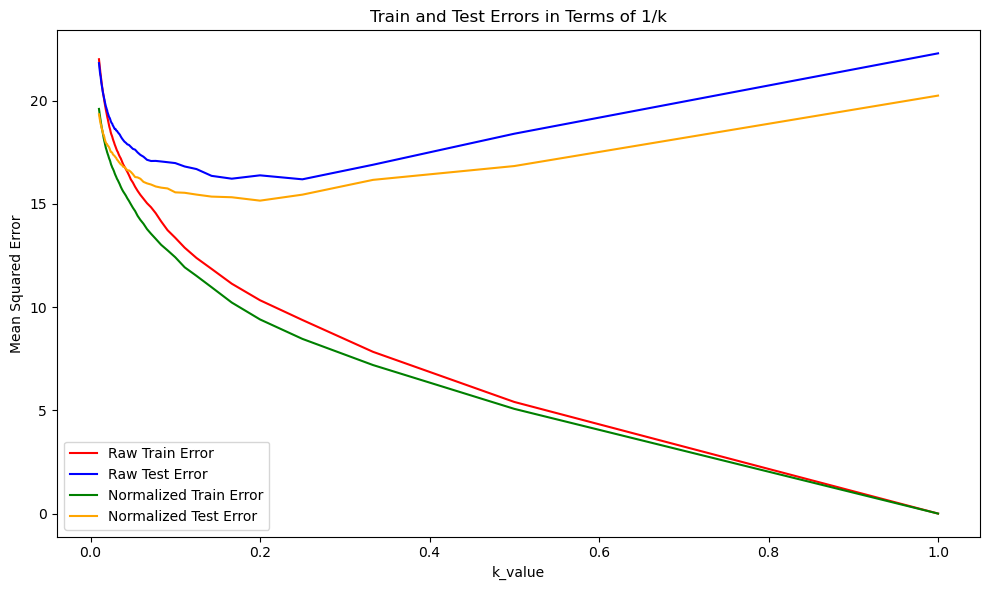

In [200]:
plt.figure(figsize=(10, 6))

colors =  ['red', 'blue', 'green', 'orange']
errors = [raw_train_error, raw_test_error, normalized_train_error, normalized_test_error]
names = ["Raw Train Error", "Raw Test Error", "Normalized Train Error", "Normalized Test Error"]
inverse_k = 1 / ks

for i in range(len(errors)):
    plt.plot(inverse_k, errors[i], label=names[i], color=colors[i])

plt.xlabel("k_value")
plt.ylabel("Mean Squared Error")
plt.title("Train and Test Errors in Terms of 1/k")
plt.legend()

plt.tight_layout()
plt.show()

In [201]:
#(h)ii
min_raw_error = min(raw_test_error)
best_raw_index = np.where(raw_test_error == min_raw_error)[0][0]
best_raw_k = ks[best_raw_index]

min_normalized_error = min(normalized_test_error)
best_normalized_index = np.where(normalized_test_error == min_normalized_error)[0][0]
best_normalized_k = ks[best_normalized_index]

print(f"For raw KNN, The best K is {best_raw_k} and the MSE is {min_raw_error:.2f}")
print(f"For normalized KNN, The best K is {best_normalized_k} and the MSE is {min_normalized_error:.2f}")

best_linear_error = min(mean_squared_test1, mean_squared_test2)
print(f"For Linear Regression the best MSE is {best_linear_error:.2f}")

For raw KNN, The best K is 4 and the MSE is 16.19
For normalized KNN, The best K is 5 and the MSE is 15.15
For Linear Regression the best MSE is 19.92


Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

By comparing all the output, the best MSE is 14.31 which means the normalized KNN shows better performance.Flexible non-parametric methods like KNN are more suitable for modeling. In addition, feature normalization plays a vital role in improving the performance of KNN models because KNN relies on calculating the distance between data points. KNN is a non-parametric model that does not assume a fixed relationship between the predictor variables and the response variable. This flexibility makes KNN more advantageous than linear regression when dealing with complex or non-linear relationships despite the simplicity and easy interpretation of linear regression models. Ultimately, although the MSE is higher in the linear regression model, it still has value because it provides a clear and easy to interpret model.

2.4.1

(a) The sample size n is extremely large, and the number of predictors p is small.

Conclusion: Generating a flexible statistical learning method would be better.

Since our sample size is very large, we can observe more of the impact of the overall data, and the large sample size will reduce the error caused by variance. Therefore, we can use a more flexible statistical learning method, which can capture the complex nonlinear relationship in the data, and because the number of predictors p is small, using a flexible method does not require too much time and resources, and there is no need to worry about it.

(b) The number of predictors p is extremely large, and the number of observations n is small.

Conclusion: Generating a inflexible statistical learning method would be better.

Since our predictors p is very large, using a flexible method will be very cumbersome and take too much time, and because the number of observations n is small, a small change will cause a large change in f, so using a flexible method will cause a higher variance and a higher risk of overfitting.

(c) The relationship between the predictors and response is highly non-linear.

Conclusion: Generating a flexible statistical learning method would be better.

Since the relationship between the predictors and response is highly non-linear, ordinary inflexible methods such as linear regression are not so suitable because they will lead to high bias and poor prediction results. And increasing the magic complexity can make the model better capture the relationship in non-linear data and reduce the bias, or errors.

(d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

Conclusion: Generating a inflexible statistical learning method would be better.

The variance of the error terms is extremely high, which means that there is a lot of noise in the data. If an overly flexible method is used, it will lead to serious overfitting, that is, too much useless information will be considered if the model is studied too carefully. So in this case, a flexible method should be used, which will avoid overfitting to noise due to its low variance.

In [196]:
#2.4.7 (a)
book_data = {
    'Obs': [1, 2, 3, 4, 5, 6],
    'X1': [0, 2, 0, 0, -1, 1],
    'X2': [3, 0, 1, 1, 0, 1],
    'X3': [0, 0, 3, 2, 1, 1],
    'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
}

book_df = pd.DataFrame(book_data)

book_rows = book_df.shape[0]  

dict_part_a = {}

for i in range(book_rows):
    part_a = np.sqrt((book_df["X1"][i] - 0)**2
                     + (book_df["X2"][i] - 0)**2
                     + (book_df["X3"][i] - 0)**2)
    
    dict_part_a[f"Observation {i+1}"] = round(part_a,2) 
    
print(dict_part_a)

{'Observation 1': 3.0, 'Observation 2': 2.0, 'Observation 3': 3.16, 'Observation 4': 2.24, 'Observation 5': 1.41, 'Observation 6': 1.73}


2.4.7 (b)
When K=1, we select the closest observation point. Since 1.41 is closest to 0,
we select Observation 5, and the Y value of Observation 5 is green.

2.4.7 (c)
When K=1, we select the three closest observation points. The three points closest to 0 are
'Observation 5': 1.41 Green
'Observation 6': 1.73 Red
'Observation 2': 2.0 Red

Since we have two reds and one green, there are more reds than greens, so our prediction is red.

2.4.7 (d)
If the Bayesian decision boundary is highly nonlinear, then we expect the optimal K value to be smaller.
Because when the Bayesian decision boundary is highly nonlinear, if the K value is too large, the model will 
be too simple, studying too many details of the neighboring data but ignoring the local nonlinear characteristics,
which will lead to underfitting and poor prediction effect. So when the data is complex and highly nonlinear,
we should use a smaller K value.